In [1]:
pip install -r "C:\Users\Skole\Desktop\requirements.txt"

  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached cffi-1.15.1-cp39-cp39-win_amd64.whl (179 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached charset_normalizer-3.3.0-cp39-cp39-win_amd64.whl.metadata (33 kB)
  Using cached click_configfile-0.2.3-py2.py3-none-any.whl (10.0 kB)
  Using cached click_default_group-1.2.4-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached click_log-0.4.0-py2.py3-none-any.whl (4.3 kB)
  Using cached cobra-0.22.0-py2.py3-none-any.whl (2.4 MB)
  Using cached comm-0.1.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached configparser-5.3.0-py3-none-any.whl (19 kB)
  Using cached cookiecutter-2.4.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached cryptography-41.0.4-cp37-abi3-win_amd64.whl.metadata (5.3 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached datapackage-1.15.2-py2.py3-none-any.whl (85 kB)
  Using cached debugpy-1.7.0-cp39-cp39-win_amd64.whl.metadata (1.1 kB)
  Using cache

  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  C

In [2]:
%run 01_Model_CFE.ipynb
import numpy as np

c:\Users\Skole\AppData\Local\Programs\Python\Python39\lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


ADS: frdp_c --> AMOR + ppi_c
CPR1_CYP71AV1: AMOR + h_c + nadph_c + o2_c --> AAOH + h2o_c + nadp_c
ADH1: AAOH + nad_c --> AAld + h_c + nadh_c
ALDH1: AAld + h2o_c + nadp_c --> AA + h_c + nadph_c


Intro to gene prediction targetsProductivity calcualted using the model standard media:

In [15]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(iMM904)
result = fseof.run(target = iMM904.reactions.ALDH1)
df = result.data_frame

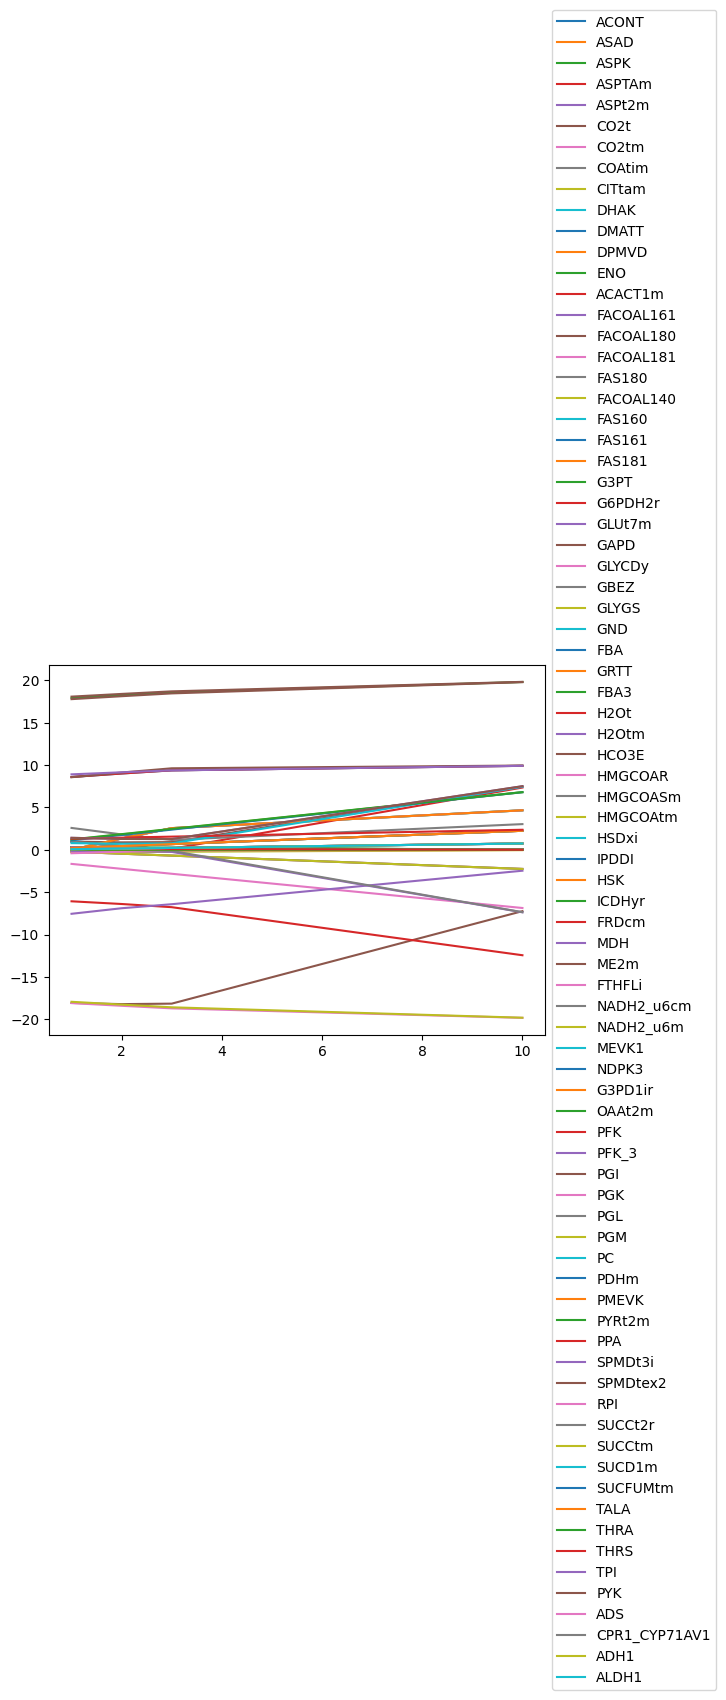

In [16]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [5]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
GAPD,18.080128,18.399085,18.701275,18.861392,19.021508,19.181625,19.341742,19.501858,19.661975,19.822092
ENO,17.925459,18.258809,18.576689,18.752165,18.927642,19.103119,19.278595,19.454072,19.629549,19.805025
PYK,17.781993,18.128694,18.460069,18.649924,18.839778,19.029632,19.219487,19.409341,19.599195,19.789050
HEX1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
TPI,8.909404,9.151189,9.375371,9.452380,9.529389,9.606398,9.683407,9.760416,9.837425,9.914434


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

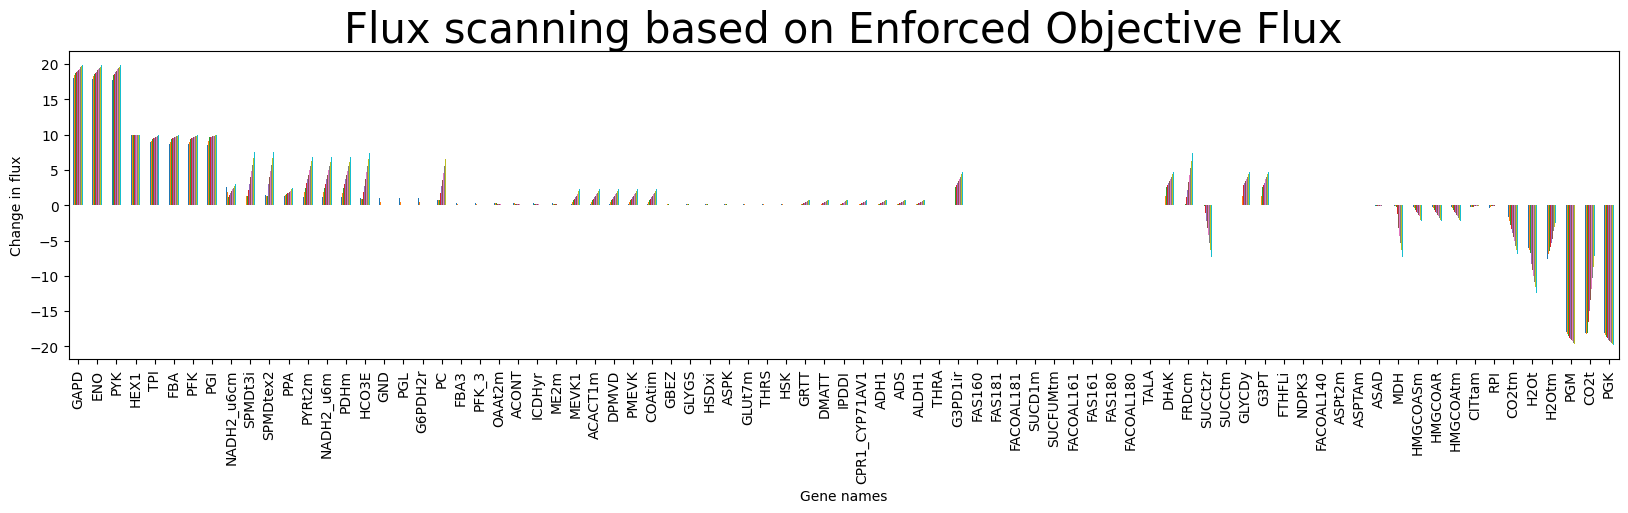

In [6]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [8]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1


In [9]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]


In [10]:
target_reactions_df


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
SPMDt3i,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
SPMDtex2,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
PYRt2m,1.231906,1.852465,2.475350,3.094827,3.714304,4.333781,4.953258,5.572735,6.192212,6.811689,1.819148
NADH2_u6m,1.200938,1.824380,2.450177,3.072758,3.695338,4.317919,4.940499,5.563080,6.185661,6.808241,1.823605
PDHm,1.123262,1.753931,2.387036,3.017401,3.647766,4.278131,4.908496,5.538861,6.169226,6.799592,1.834805
HCO3E,0.973859,0.885847,0.916027,1.851036,2.786046,3.721056,4.656066,5.591076,6.526086,7.461096,1.869475
PC,0.792315,0.721197,0.768454,1.721658,2.674862,3.628065,4.581269,5.534473,6.487677,7.440880,1.893519
MEVK1,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426
ACACT1m,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426
DPMVD,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426


In [11]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

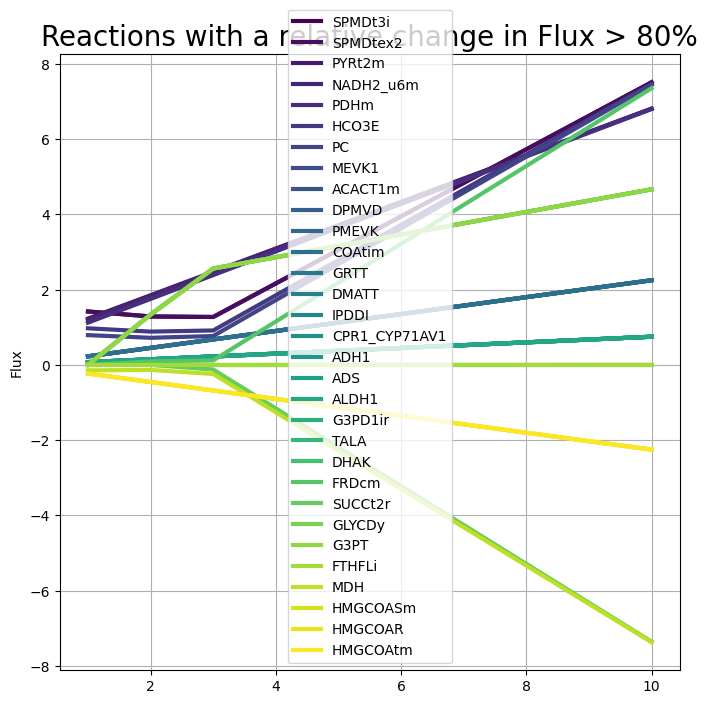

In [12]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [13]:
#lowest flux reactions
target_reactions_df.tail()


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
FTHFLi,0.000000,0.000000,0.001141,0.001000,0.000859,0.000719,0.000578,0.000437,0.000297,0.000156,2.000000
MDH,-0.143354,-0.132628,-0.239790,-1.258171,-2.276553,-3.294934,-4.313316,-5.331697,-6.350079,-7.368460,1.980545
HMGCOASm,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426
HMGCOAR,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426
HMGCOAtm,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426


In [14]:
#higest flux reactions
target_reactions_df.head()


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
SPMDt3i,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
SPMDtex2,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
PYRt2m,1.231906,1.852465,2.475350,3.094827,3.714304,4.333781,4.953258,5.572735,6.192212,6.811689,1.819148
NADH2_u6m,1.200938,1.824380,2.450177,3.072758,3.695338,4.317919,4.940499,5.563080,6.185661,6.808241,1.823605
PDHm,1.123262,1.753931,2.387036,3.017401,3.647766,4.278131,4.908496,5.538861,6.169226,6.799592,1.834805
